# **Import**

Se hace la importación  de las herramientas necesarias para el correcto funcionamiento de la aplicación.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import warnings
from google.colab import drive
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
import pandas as pd

drive.mount("/content/drive")
df = pd.read_csv("/content/drive/MyDrive/InteligenciaArtificial20242_Natalia_Londoño/datacolab.csv")

KeyboardInterrupt: 

# **Limpieza**

En este apartado procedemos  a hacer la limpieza de nuestro dataset, con el fin de mejorar la calidad del mismo y por ende las de nuestro analisis.

# **Datos nulos**

Para verificar la integridad de los datos primero analizamos si en las columnas de nuestro dataset existen datos nulos que puedan perjudicar los resultados.

In [ ]:
#Determine if ANY Value in a Series is Missing
df.isnull().any()

,0
Marital status,False
Application mode,False
Application order,False
Course,False
Daytime/evening attendance\t,False
Previous qualification,False
Previous qualification (grade),False
Nacionality,False
Mother's qualification,False
Father's qualification,False


Si analizamos los resultados nos damos cuenta de que no existen valores nulos, esto facilita nuestro trabajo, ya que, evitamos reemplazos o eliminaciones.

# Grafico de cajas y bigotes para dos variables numericas en relacion de la clase

In [ ]:
# Seleccionar dos variables numéricas junto con la variable de clase
selected_columns1 = ['Application mode', 'Unemployment rate', 'Admission grade','Age at enrollment','Curricular units 1st sem (grade)','Target']

# Filtrar el dataframe con las columnas seleccionadas
df_selected1 = df[selected_columns1]

In [ ]:
import plotly.express as px

fig_application_mode = px.box(df, x='Target', y='Application mode',
                              title='Box Plot: Application mode by Target')
fig_application_mode.show()

Este gráfico nos da entender en consideración de la totalidad de los datos de Dropout 1421 que : el 25% ( aprox 356 ) de los 1421 estudiantes que desertaron tuvieron un modo de aplicación en el 0 y el 5 , los modos de aplicación aproximadamente el 50% de los que desertaron escogieron entre el modo 7 hasta el modo 27 incluyendo los intermedios( ) y el valor medio de estos modos de aplicación fue el 18; en consideración aprox 356 de estos escogieron dentro de rango de modos de 39-53; esto nos demuestra que 710 estudiantes desertaron al escoger un modo entre 7-27 ; evidenciando mayor dificultad en estos modos de ingreso. De los 794 estudiantes matriculados aprox 397 escogieron entre el modo 1-16 de los cuales 198 aplicaron por el modo 1. También el 25%( aprox 198) escogieron entre 17 y- 27, dejándonos por evidencia que aprox 595 matriculados escogieron un modo de aplicación por debajo del 39 dejando como modo medio el 17. De los 2209 graduados se nota una tendencia de aproximadamente 1657 que aplicaron entre el modo 1-17 con un modo medio en 7; con este analisis podemos decir que la categoría "Dropout" y "Enrolled" tienen rangos similares, pero "Graduate" tiene un valor de mediana más bajo y varios modos de aplicación sin escoger.

In [ ]:
import plotly.express as px

fig_unemployment_rate = px.box(df, x='Target', y='Unemployment rate',
                               title='Box Plot: Unemployment rate by Target')
fig_unemployment_rate.show()

De este gráfico podemos definir que de los 1421 estudiantes que desertaron aproximadamente 356 registraron una tasa de desempleo por debajo de 9.4% y aproximadamente 710 estudiantes tienen una tasa de desempleo entre 9.4% y 12.7% ; lo que indica una tendencia de aproximadamente el 50% de los estudiantes que desertaron tienen una tasa de desempleo superior al 10.8% hasta el pico registrado en 16.2% lo que indica una fuerte razón de deserción. los estudiantes graduados no presentan mayor diferencia ya que el 50% de los 2209 registraron una tasa de desempleo por debajo de 9.4% y aproximadamente 1104 estudiantes tienen una tasa de desempleo entre 9.4% y 12.7% ; lo que indica una tendencia de aproximadamente el 50% de los estudiantes graduados también tienen una tasa de desempleo superior al 10.8%, esto difiere en los estudiantes matriculados ya que 596 estudiantes de los 794 registraron una tasa de desempleo por debajo de 12.7% a diferencia de los graduados y desertores que dentro de su 75% registran una tasa por debajo de 13.9%.

In [ ]:
import plotly.express as px

fig_curricular_units = px.box(df, x='Target', y='Curricular units 1st sem (grade)',
                              title='Box Plot: Curricular units 1st sem (grade) by Target')
fig_curricular_units.show()

este gráfico nos indica el promedio de calificaciones del primer semestre ( entre 0-20)y nos podemos dar cuenta que de las 1421 personas que desertaron, si tiene registros válidos en los promedio solo de 848 y de estas 212 tienen el promedio en 0; indicando como tal un promedio menor a 12.2 para 636 estudiantes que desertaron , mostrando significativamente que los promedio altos por encima de 12.2 hasta 18 solo corresponde aprox a 212 personas; lo cual indica una tendencia de un 75 % com promedio por debajo de la mitad permitidos.En los graduados de los 2127 registros válidos el 100% de estos tiene un promedio entre 10 y 16.4; lo que indica un alto nivel de desempeño académico con una media de 13, superior en promedio en un 33% a los que desertaron. de los 723 matriculados con registros válidos; aprox 180 estudiantes tiene un promedio entre 10 y 11, y 361 estudiantes tienen un promedio cerca de la media(12) entre 11 y 12.85; lo cual indica que los 723 tienen un rendimiento superior al 50%( 10 puntos) esperado.

In [ ]:
import plotly.express as px

fig_age_enrollment = px.box(df, x='Target', y='Age at enrollment',
                            title='Box Plot: Age at enrollment by Target')
fig_age_enrollment.show()

Del anterior gráfico se puede deducir que de los 1421 estudiantes que desertaron, 237 fueron considerados atípicos en cuanto a la edad de inscripción. Aproximadamente de los 1184 validos la mediana de la edad de deserción está alrededor de 23 años. Esto indica que un 50%( 592) de los desertores tenía una edad de inscripción entre los 19 y 30.25 años, mientras que un 25% tenía una edad superior a 30.25 años El valor máximo en la edad de los desertores llega a 70 años, lo que significa que desertan en edades mucho mayores.De los 2209 estudiantes que se graduaron, 152 fueron considerados atipicos, mientras que de los 2057 la mediana para la edad de los estudiantes graduados es aproximadamente 19 años, lo que indica que aprox 1028 de los estudiantes se inscribieron entre los 18 y 21 años. En general, los graduados presentan una menor variabilidad en la edad de inscripción en comparación con los desertores. El valor máximo registrado de edad para los graduados es de 62 años. ademas De los 794 estudiantes matriculados, de los 742, 371 se inscribieron con edades entre los 19 y 23 años.; lo que nos indica una media de 20 años y la máxima edad en este grupo es de 54 años.con esto el resultado académico de los estudiantes, con aquellos que desertan tienden a ser mayores en comparación con los que se gradúan o permanecen matriculados.

In [ ]:
import plotly.express as px

fig_admission_grade = px.box(df, x='Target', y='Admission grade',
                             title='Box Plot: Admission grade by Target')
fig_admission_grade.show()

De este gráfico podemos definir que de los 1421 estudiantes que desertaron (Dropout), aproximadamente 355 registraron una nota de admisión por debajo de 115 y aproximadamente 710 estudiantes tienen una nota entre 115 y 133.025; lo que indica una tendencia de aproximadamente el 50% de los estudiantes que desertaron tienen una nota de admisión superior a 123.8 hasta el pico registrado en 180, lo que sugiere que incluso estudiantes con notas altas pueden desertar. Los estudiantes graduados (Graduate) presentan una distribución ligeramente diferente, ya que el 50% de los 2209 registraron una nota de admisión por debajo de 127.4 y aproximadamente 1104 estudiantes tienen una nota entre 119.7 y 138.4; lo que indica una tendencia de aproximadamente el 50% de los estudiantes graduados tienen una nota de admisión superior a 127.4, ligeramente más alta que los desertores. Esto difiere en los estudiantes matriculados (Enrolled) ya que 596 estudiantes de los 794 registraron una nota de admisión por debajo de 133.3, a diferencia de los graduados y desertores que dentro de su 75% registran una nota por debajo de 138.4 y 133.025 respectivamente. Es notable que la mediana de notas de admisión es más alta para los graduados (127.4) que para los desertores (123.8), lo que podría indicar una leve correlación entre notas de admisión más altas y mayor probabilidad de graduación.

#Arreglar datos atípicos de gráficos de cajas y bigotes



In [ ]:
# ARREGLAR DATOS ATIPICOS DE modo_aplicacion

# Calcular el rango intercuartil (IQR) para identificar valores atípicos
def replace_outliers(df, group_col, value_col):
    df_copy = df.copy()

    # Agrupar por el objetivo y calcular la media y los cuartiles
    for group in df[group_col].unique():
        grupo_df = df[df[group_col] == group]
        Q1 = grupo_df[value_col].quantile(0.25)
        Q3 = grupo_df[value_col].quantile(0.75)
        IQR = Q3 - Q1

        # Límites para determinar valores atípicos
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Reemplazar los valores atípicos por la media de esa categoría
        group_mean = grupo_df[value_col].mean()
        df_copy.loc[
            (df_copy[group_col] == group) &
            ((df_copy[value_col] < lower_bound) | (df_copy[value_col] > upper_bound)),
            value_col
        ] = group_mean

    return df_copy

# Reemplazar los outliers en la columna 'modo_aplicacion'
df_replaced = replace_outliers(df, 'Target', 'Application mode')

# Crear el gráfico de cajas con los valores ajustados
fig_admission = px.box(df_replaced, x='Target', y='Application mode', title='Box Plot: modo_aplicacion por objetivo (Outliers Replaced)')
fig_admission.show()

<ipython-input-5-b6a18ddcd641>:20: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '23.712878254750176' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



In [ ]:
# ARREGLAR DATOS ATIPICOS DE  edad_de_inscripcion

# Calcular el rango intercuartil (IQR) para identificar valores atípicos
def replace_outliers(df, group_col, value_col):
    df_copy = df.copy()

    # Agrupar por el objetivo y calcular la media y los cuartiles
    for group in df[group_col].unique():
        grupo_df = df[df[group_col] == group]
        Q1 = grupo_df[value_col].quantile(0.25)
        Q3 = grupo_df[value_col].quantile(0.75)
        IQR = Q3 - Q1

        # Límites para determinar valores atípicos
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Reemplazar los valores atípicos por la media de esa categoría
        group_mean = grupo_df[value_col].mean()
        df_copy.loc[
            (df_copy[group_col] == group) &
            ((df_copy[value_col] < lower_bound) | (df_copy[value_col] > upper_bound)),
            value_col
        ] = group_mean

    return df_copy

# Reemplazar los outliers en la columna 'grado_admision'
df_replaced = replace_outliers(df, 'Target', 'Age at enrollment')

# Crear el gráfico de cajas con los valores ajustados
fig_admission = px.box(df_replaced, x='Target', y='Age at enrollment', title='Box Plot: edad_de_inscripcion por objetivo (Outliers Replaced)')
fig_admission.show()


<ipython-input-6-515fe087ef47>:20: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '26.06896551724138' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



In [ ]:
# ARREGLAR DATOS ATIPICOS DE  grado_admision

# Calcular el rango intercuartil (IQR) para identificar valores atípicos
def replace_outliers(df, group_col, value_col):
    df_copy = df.copy()

    # Agrupar por el objetivo y calcular la media y los cuartiles
    for group in df[group_col].unique():
        grupo_df = df[df[group_col] == group]
        Q1 = grupo_df[value_col].quantile(0.25)
        Q3 = grupo_df[value_col].quantile(0.75)
        IQR = Q3 - Q1

        # Límites para determinar valores atípicos
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Reemplazar los valores atípicos por la media de esa categoría
        group_mean = grupo_df[value_col].mean()
        df_copy.loc[
            (df_copy[group_col] == group) &
            ((df_copy[value_col] < lower_bound) | (df_copy[value_col] > upper_bound)),
            value_col
        ] = group_mean

    return df_copy

# Reemplazar los outliers en la columna 'grado_admision'
df_replaced = replace_outliers(df, 'Target', 'Admission grade')

# Crear el gráfico de cajas con los valores ajustados
fig_admission = px.box(df_replaced, x='Target', y='Admission grade', title='Box Plot: grado_admision by objetivo (Outliers Replaced)')
fig_admission.show()


In [ ]:
# ARREGLAR DATOS ATIPICOS DE  UNIDADES CURRICULARES 2 SEMESTRE GRADO

# Calcular el rango intercuartil (IQR) para identificar valores atípicos
def replace_outliers(df, group_col, value_col):
    df_copy = df.copy()

    # Agrupar por el objetivo y calcular la media y los cuartiles
    for group in df[group_col].unique():
        grupo_df = df[df[group_col] == group]
        Q1 = grupo_df[value_col].quantile(0.25)
        Q3 = grupo_df[value_col].quantile(0.75)
        IQR = Q3 - Q1

        # Límites para determinar valores atípicos
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Reemplazar los valores atípicos por la media de esa categoría
        group_mean = grupo_df[value_col].mean()
        df_copy.loc[
            (df_copy[group_col] == group) &
            ((df_copy[value_col] < lower_bound) | (df_copy[value_col] > upper_bound)),
            value_col
        ] = group_mean

    return df_copy

# Reemplazar los outliers en la columna 'grado_admision'
df_replaced = replace_outliers(df, 'Target', 'Curricular units 1st sem (grade)')

# Crear el gráfico de cajas con los valores ajustados
fig_admission = px.box(df_replaced, x='Target', y='Curricular units 1st sem (grade)', title='Box Plot: unidades_curriculares_1st_semestre_(grado) by objetivo (Outliers Replaced)')
fig_admission.show()

#Diagramas

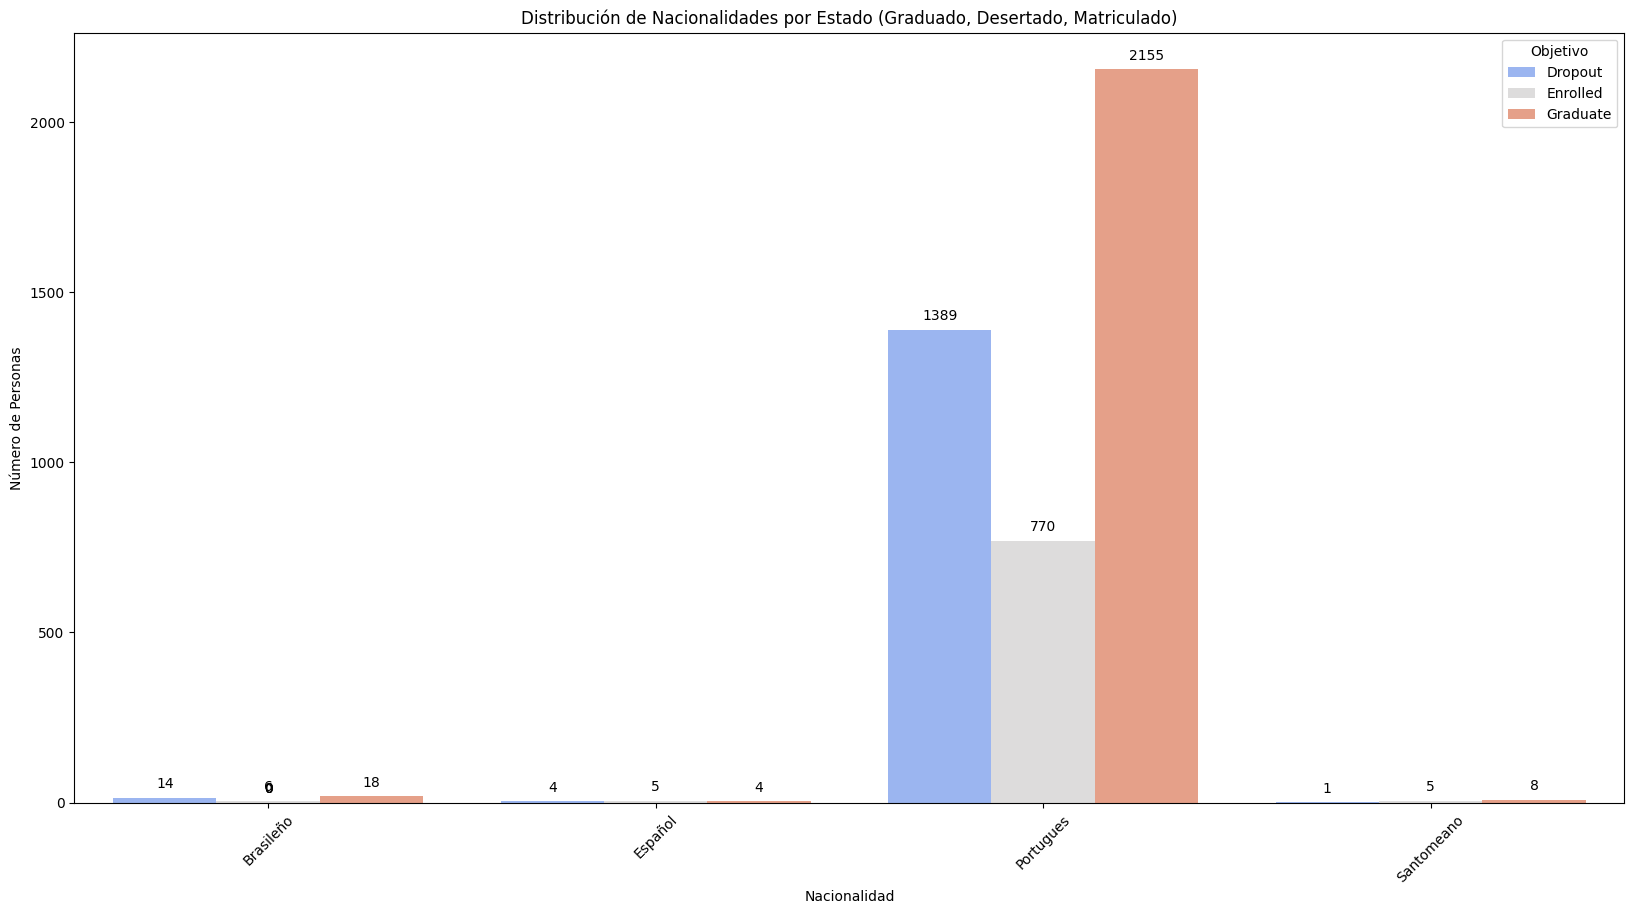

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Diccionario con los códigos y países
paises = {
    1: 'Portugues',
    6: 'Español',
    26: 'Santomeano',
    41: 'Brasileño',

}

# Mapear los códigos a los nombres de los países
df['Nacionality'] = df['Nacionality'].map(paises)

# Contar el número de ocurrencias por nacionalidad y objetivo
conteo_paises_objetivo = df.groupby(['Nacionality', 'Target']).size().reset_index(name='count')

# Crear el gráfico de barras usando Seaborn
plt.figure(figsize=(20, 10))
bar_plot = sns.barplot(x='Nacionality', y='count', hue='Target', data=conteo_paises_objetivo, palette='coolwarm')

# Agregar las anotaciones encima de cada barra
for p in bar_plot.patches:
    bar_plot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 10),
        textcoords='offset points'
    )

plt.xlabel('Nacionalidad')
plt.ylabel('Número de Personas')
plt.title('Distribución de Nacionalidades por Estado (Graduado, Desertado, Matriculado)')
plt.xticks(rotation=45)
plt.legend(title='Objetivo')
plt.show()


La gráfica muestra una clara dominancia de estudiantes portugueses en todas las etapas académicas evaluadas. Los estudiantes portugueses representan el grupo más numeroso tanto en matrícula, como en aquellos que desertan, los cuales son 1389 y en los que finalmente se gradúan, alcanzando un total de 2155 graduados. En contraste, la participación de estudiantes santomeños, brasileños y españoles es mínima en todas las categorías. También, resulta preocupante la desproporción entre el número de estudiantes matriculados (770) y los que desertan (1389). Esta disparidad sugiere una problemática significativa en el proceso de retención estudiantil, lo cual podría indicar la existencia de obstáculos académicos.

     Target  count
0  Graduate   2209
1   Dropout   1421
2  Enrolled    794


<ipython-input-5-73a8784b3b79>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Target', y='count', data=conteo_objetivo, palette='coolwarm')


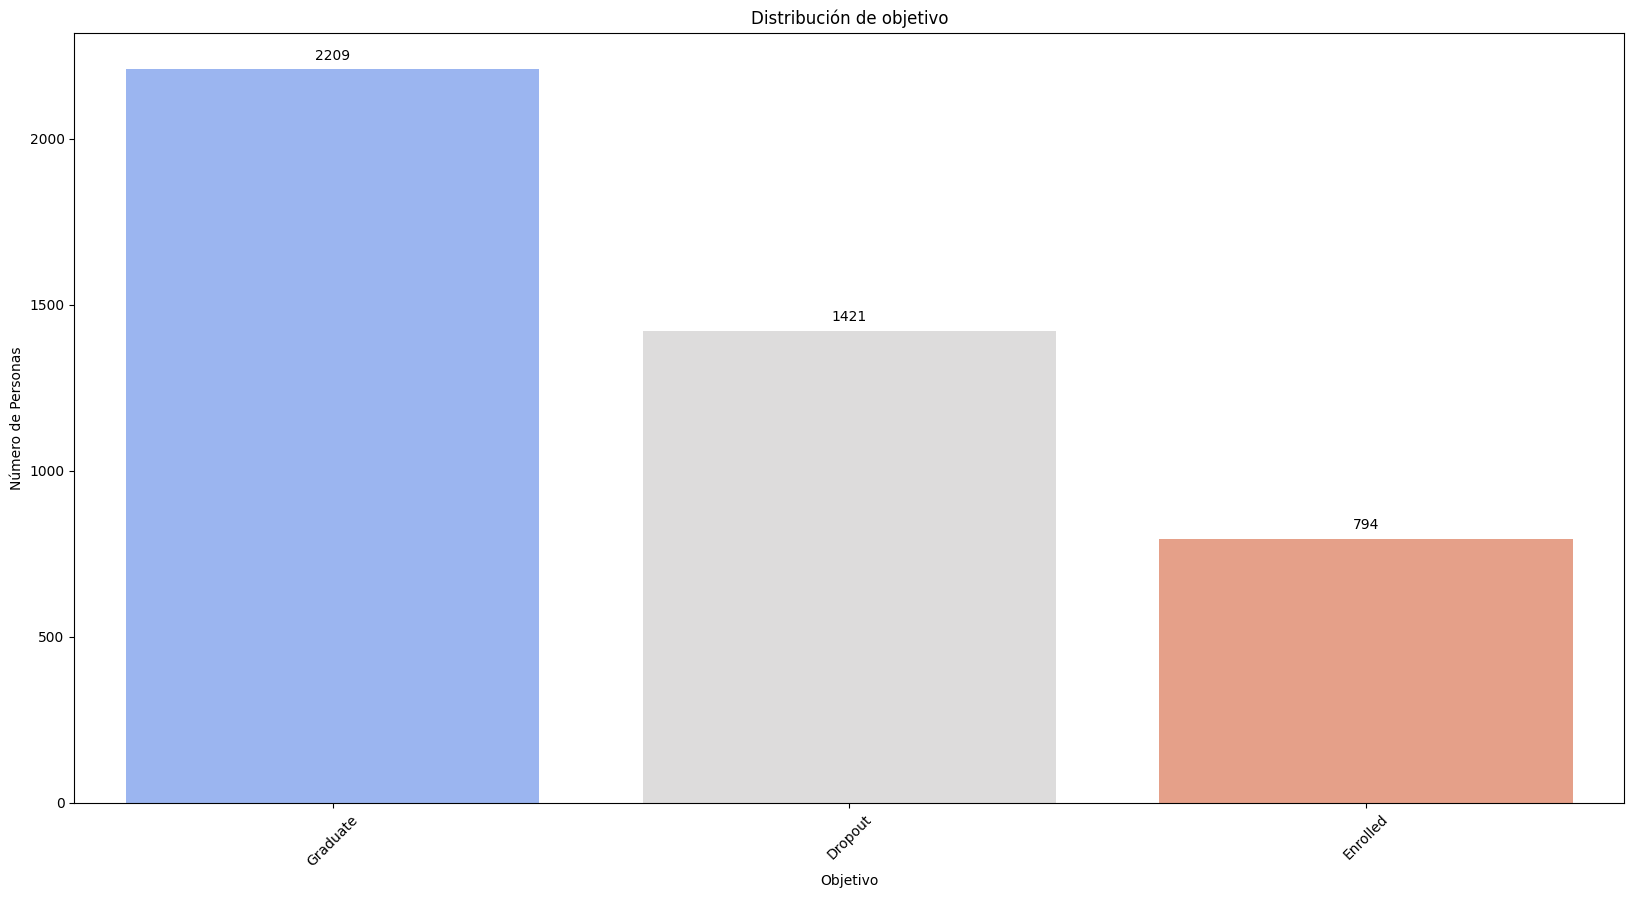

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Contar el número de ocurrencias de cada nacionalidad y ordenar
conteo_objetivo = df['Target'].value_counts().reset_index()
conteo_objetivo.columns = ['Target', 'count']  # Renombrar columnas para claridad
print(conteo_objetivo)

# Crear el gráfico de barras usando Seaborn
plt.figure(figsize=(20, 10))
bar_plot = sns.barplot(x='Target', y='count', data=conteo_objetivo, palette='coolwarm')

# Agregar las anotaciones encima de cada barra
for p in bar_plot.patches:
    bar_plot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 10),
        textcoords='offset points'
    )

plt.xlabel('Objetivo')
plt.ylabel('Número de Personas')
plt.title('Distribución de objetivo')
plt.xticks(rotation=45)
plt.show()

Llama la atención que el número de graduados (2209) sea considerablemente mayor que el de estudiantes matriculados (1421). Esto sugiere que existe un flujo constante de nuevos estudiantes que logran completar sus estudios, y una tasa de deserción de 794 personas.

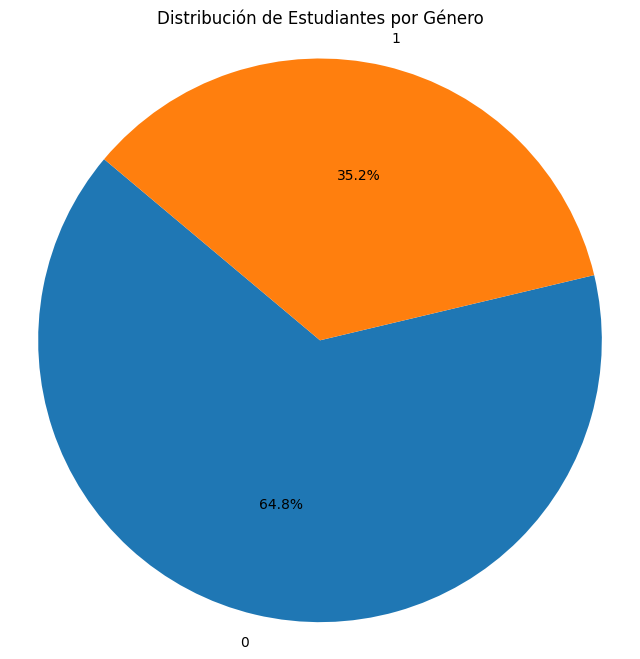

In [ ]:
# Contar el número de estudiantes por género
counts = df['Gender'].value_counts()

# Crear un gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Estudiantes por Género')
plt.axis('equal')  # Para asegurar que el gráfico es un círculo
plt.show()


La gráfica circular presentada muestra una clara predominancia del género femenino en la población estudiantil analizada. Con un 64.8% de mujeres y solo un 35.2% de hombres, se evidencia una marcada disparidad en la representación de ambos géneros.

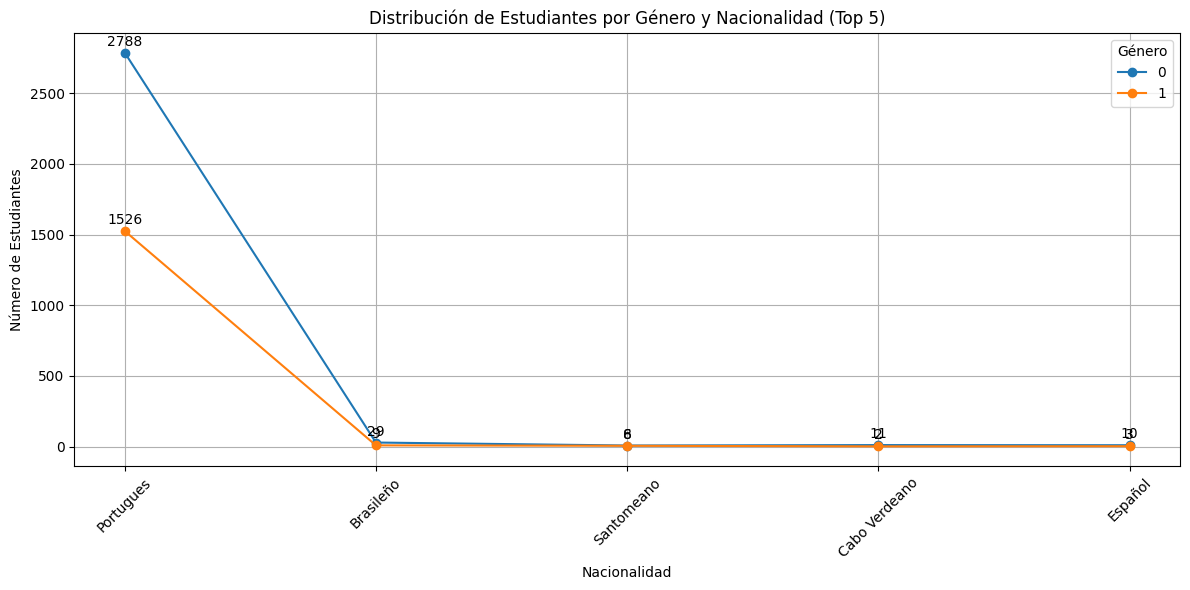

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que ya tienes el DataFrame df

# Diccionario con los códigos y países
paises = {
    1: 'Portugues',
    2: 'Alemán',
    6: 'Español',
    11: 'Italiano',
    13: 'Holandés',
    14: 'Inglés',
    17: 'Lituano',
    21: 'Angoleño',
    22: 'Cabo Verdeano',
    24: 'Guineense',
    25: 'Mozambicano',
    26: 'Santomeano',
    32: 'Turco',
    41: 'Brasileño',
    62: 'Rumano',
    100: 'Moldavo',
    101: 'Mexicano',
    103: 'Ucraniano',
    105: 'Ruso',
    108: 'Cubano',
    109: 'Colombiano'
}

# Mapear los códigos a los nombres de los países
df['Nacionality'] = df['Nacionality'].map(paises)

# Agrupar el dataset por 'Nacionalidad' y 'Gender' y contar el número de ocurrencias
grouped_data = df.groupby(['Nacionality', 'Gender']).size().unstack(fill_value=0)

# Seleccionar los 5 países con más valores
top_countries = grouped_data.sum(axis=1).nlargest(5).index
filtered_data = grouped_data.loc[top_countries]

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
for gender in filtered_data.columns:
    plt.plot(filtered_data.index, filtered_data[gender], marker='o', label=gender)

    # Agregar los valores sobre los puntos
    for i, value in enumerate(filtered_data[gender]):
        plt.annotate(
            format(value, 'd'),
            (filtered_data.index[i], value),
            textcoords="offset points",
            xytext=(0, 5),
            ha='center'
        )

# Configuración del gráfico
plt.title('Distribución de Estudiantes por Género y Nacionalidad (Top 5)')
plt.xlabel('Nacionalidad')
plt.ylabel('Número de Estudiantes')
plt.xticks(rotation=45)
plt.legend(title='Género')
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()



La gráfica muestra una marcada disparidad en la distribución de estudiantes por género y nacionalidad, con una notable predominancia femenina entre los estudiantes portugueses (2788 mujeres vs. 1526 hombres). Esta diferencia de género se acentúa al comparar con las otras nacionalidades representadas (brasileña, santomeña, caboverdeana y española), donde la presencia masculina es prácticamente inexistente o muy reducida.

# Matriz de correlacion de pearson

La matriz de correlación de Pearson muestra las relaciones lineales entre múltiples variables.

* Analizando la matriz nos damos cuenta de la presencia
 de colores con un tono de rojo oscuro (correlación positiva fuerte, cercana a 1), esto nos indica una relacion lineal directa, significa que algunas variables contienen información muy similar o redundante (dependencia o influencia mutua entre ellas), con lo cual eliminaremos las variables (columnas) con un valor mayor o igual a 0.7.


* En la matriz tambien podemos observar el color azul oscuro (correlación negativa fuerte, cercana a -1). Los valores cercanos a cero, que aparecen en tonos más claros, indican poca o ninguna correlación, variables "unicas".

* En la diagonal principal los valores siempre serán 1, porque es la correlación de cada variable consigo misma.

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning:

Glyph 9 (	) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 9 (	) missing from current font.



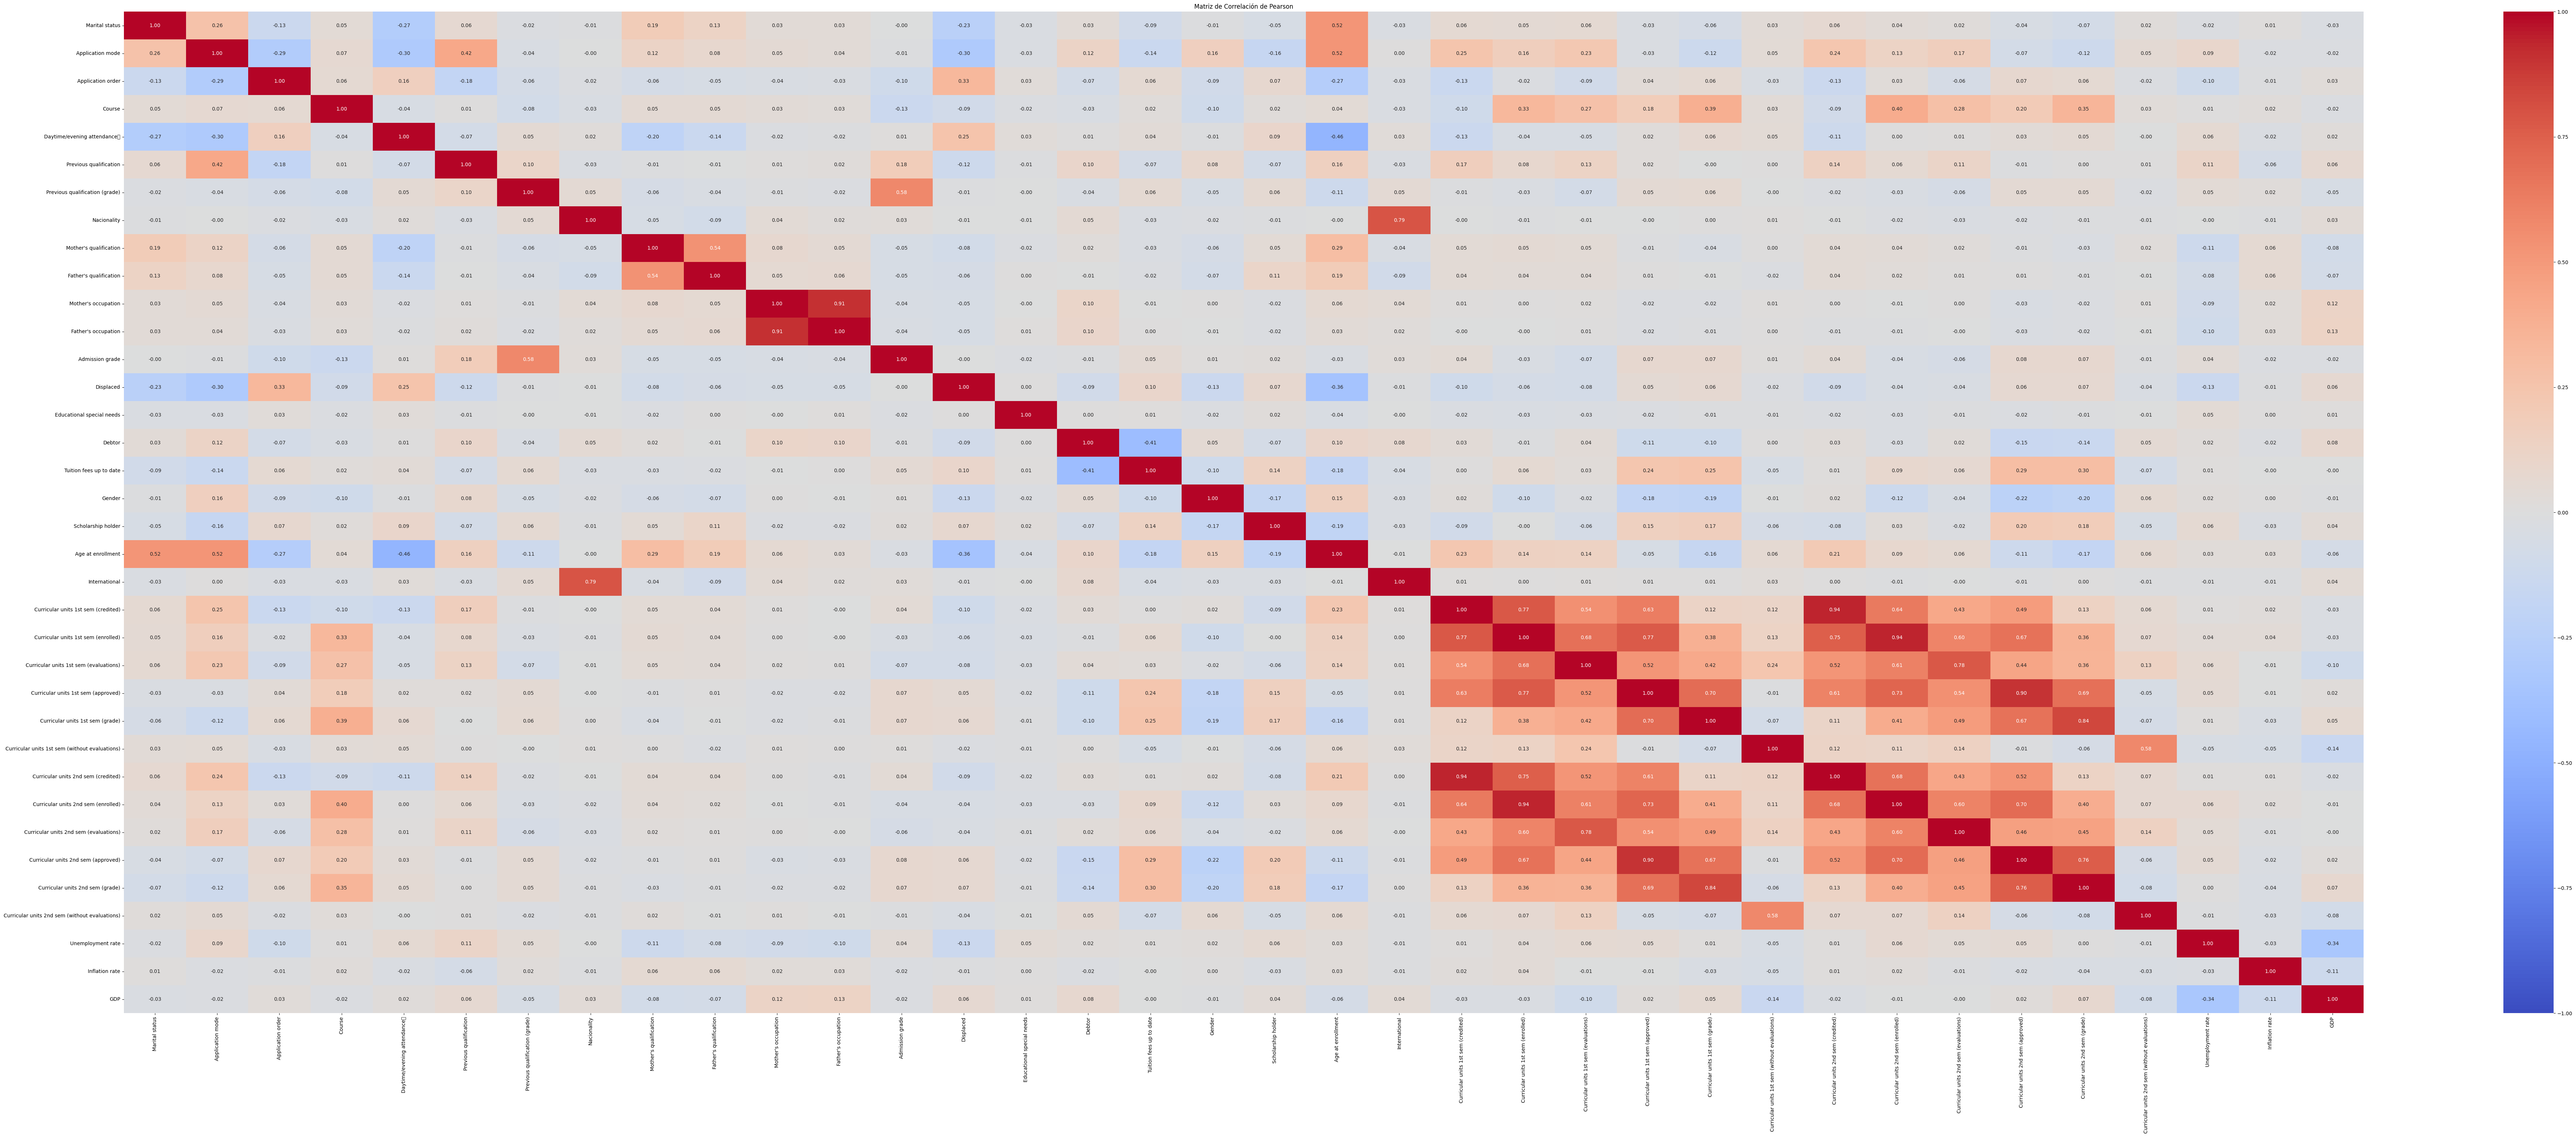

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la matriz de correlación de Pearson
df2 = df.drop(columns=['Target'])
correlacion = df2.corr(method='pearson')

# Crear el heatmap
plt.figure(figsize=(100, 36))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Matriz de Correlación de Pearson')
plt.show()

# Se eliman las columnas con mas de 0.7 de correlaccion

Despues de analizar la matiz de correlacion procedemos a eliminar las columnas que tengan un valor de correlacion mayor o igual a 0.7

In [ ]:
# Crear un DataFrame para guardar las columnas que se eliminarán
columnas_a_eliminar = set()

# Iterar sobre la matriz de correlación
for i in range(len(correlacion.columns)):
    for j in range(i):
        if abs(correlacion.iloc[i, j]) >= 0.7:
            # Obtener el nombre de la columna con alta correlación
            colname = correlacion.columns[i]
            columnas_a_eliminar.add(colname)

# Eliminar las columnas que tienen alta correlación
data_reducido = df.drop(columns=list(columnas_a_eliminar))

# Mostrar las columnas eliminadas y el DataFrame reducido
print(f"Columnas eliminadas debido a alta correlación (>= 0.7): {columnas_a_eliminar}")
print("DataFrame reducido:")
data_reducido


Columnas eliminadas debido a alta correlación (>= 0.7): {'International', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (grade)', "Father's occupation", 'Curricular units 1st sem (enrolled)'}
DataFrame reducido:


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (evaluations),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,20,0,0,0.000000,0,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,19,0,6,14.000000,0,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,19,0,0,0.000000,0,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,20,0,8,13.428571,0,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,45,0,9,12.333333,0,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,19,0,7,13.600000,0,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,18,0,6,12.000000,0,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,30,0,8,14.912500,0,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,20,0,5,13.800000,0,0,9.4,-0.8,-3.12,Graduate


Como se puede apreciar en la parte superio despues de eliminar las columnas con una correlacion mayor o igual a 0.7, el dataset queda reducido a 28 columnas, es decir han sido eliminadas 9 columnas debido a la alta correlacion.

In [ ]:
df = data_reducido

# Identificar si hay columnas con el 30% de los valores

Es necesario realizar esta verificacion, ya que, si una columna tiene una gran cantidad de valores faltantes (más del 30%), la información que aporta esa variable puede no ser suficiente o confiable para tomar decisiones significativas. Si decidimos incluirla en el análisis podría introducir sesgo o ruido.


In [ ]:
# Calcular el porcentaje de valores faltantes en cada columna
missing_percentage = df.isnull().mean() * 100

# Filtrar las columnas con más del 30% de valores faltantes
columns_with_missing_data = missing_percentage[missing_percentage > 30]

# Mostrar las columnas que cumplen con la condición
print(columns_with_missing_data)

Series([], dtype: float64)


Al ejecutar nos dimos cuenta de que ninguna columna cuenta con este problema, lo cual nos facilita el trabajo

# **Identificacion de los datos atipicos**

En este apartada identificaremos valores atipicos, tambien llamados outliers, es un apartado de vital importancia porque puede tener un impacto significativo en la calidad y la validez de los resultados. Los datos atipicos afectan de gran manera debido a que son puntos de datos que se desvían considerablemente de otros puntos (lo normal) en su conjunto de datos. Esto puede llevar a conclusiones incorrectas.

# Remplazar por moda las variables categoricas

En este apartado decidimos considerar como atipicos a la variables categoricas con muy baja frecuenta, para arreglar estos datos atipicos sustituiremos por la moda.

In [ ]:
def replace_outliers_categoricas(df, column, threshold, mode_value):
    frecuencia = df[column].value_counts()
    return df[column].apply(lambda x: mode_value if frecuencia[x] < threshold else x)


In [ ]:

# Definir la moda
mode_value = 9500

# Definir un umbral para identificar atípicos (por ejemplo, categorías que ocurren menos de 50 veces)
threshold = 14

# Reemplazar las categorías con baja frecuencia por la moda
df['Course'] = replace_outliers_categoricas(df, 'Course', threshold, mode_value)


# Definir la moda
mode_value = 9

# Definir un umbral para identificar atípicos
threshold = 4

# Reemplazar las categorías con baja frecuencia por la moda
df['Mother\'s occupation'] = replace_outliers_categoricas(df, 'Mother\'s occupation', threshold, mode_value)

# Definir la moda
mode_value = 1

# Definir un umbral para identificar atípicos
threshold = 7

# Reemplazar las categorías con baja frecuencia por la moda
df['Previous qualification'] = replace_outliers_categoricas(df, 'Previous qualification', threshold, mode_value)


La funcion replace_outliers_categoricas nos ayuda a arreglar los valores atipicos de las variables categoricas que los presentan, en este caso (depues de un analisis de frecuencias) han sido: Course, Mother\'s occupation y Previous qualification. A cada variable se le define su moda y su umbral y son enviados a la funcion replace_outliers_categoricas la cual utiliza lambdas.

# Reemplazar por media las variables numericas

En esta seccion reemplazamos variables numéricas con datos atipicos por la media, siendo útil para tratar valores atipicos que puedan afectar nuestro analisis. Para ello se calcula la media sin contar estos datos atipicos. Esto se hara para las variables analizadas anteriormente en los graficos de cajas y bigotes en los cuales detectamos demasiados outliers.

In [ ]:
def replace_outliers(df, column, lower_bound, upper_bound, mean_value):
    return df[column].apply(lambda x: mean_value if x < lower_bound or x > upper_bound else x)


In [ ]:
px.box(df,y='Admission grade', title='Boxplot variable Course')

In [ ]:
import pandas as pd

# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3)
Q1 = df['Admission grade'].quantile(0.25)
Q3 = df['Admission grade'].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Definir los límites inferior y superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Calcular la media de los datos no atípicos
mean_value = 126.978119

# Reemplazar los valores atípicos con la media
df['Admission grade'] = df['Admission grade'].apply(lambda x: mean_value if x < lower_bound or x > upper_bound else x)

In [ ]:
px.box(df,y='Age at enrollment', title='Boxplot variable Course')

In [ ]:

# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3)
Q1 = df['Age at enrollment'].quantile(0.25)
Q3 = df['Age at enrollment'].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Definir los límites inferior y superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Calcular la media de los datos no atípicos
mean_value = 23

# Reemplazar los valores atípicos con la media
df['Age at enrollment'] = df['Age at enrollment'].apply(lambda x: mean_value if x < lower_bound or x > upper_bound else x)

In [ ]:
px.box(df,y='Previous qualification (grade)', title='Boxplot variable Course')

In [ ]:

# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3)
Q1 = df['Previous qualification (grade)'].quantile(0.25)
Q3 = df['Previous qualification (grade)'].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Definir los límites inferior y superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Calcular la media de los datos no atípicos
mean_value = 132

# Reemplazar los valores atípicos con la media
df['Previous qualification (grade)'] = df['Previous qualification (grade)'].apply(lambda x: mean_value if x < lower_bound or x > upper_bound else x)

# Se establece la clase como binomial

En este apartado buscamos establecer la clase como binomial. Lo que nos va a permitir utilizar técnicas de modelado más sencillas y facilitar la interpretación de resultados. En el codigo se realiza lo siente: Convertir 'Graduate' en 1 y las otras clases en 0 directamente en la columna 'Target'

In [ ]:
# Convertir 'Graduate' en 1 y las otras clases en 0 directamente en la columna 'Target'
df['Target'] = df['Target'].apply(lambda x: 1 if x == 'Dropout' else 0)


In [ ]:
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (evaluations),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,20,0,0,0.000000,0,0,10.8,1.4,1.74,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,19,0,6,14.000000,0,0,13.9,-0.3,0.79,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,19,0,0,0.000000,0,0,10.8,1.4,1.74,1
3,1,17,2,9773,1,1,122.0,1,38,37,...,20,0,8,13.428571,0,0,9.4,-0.8,-3.12,0
4,2,39,1,8014,0,1,132.0,1,37,38,...,23,0,9,12.333333,0,0,13.9,-0.3,0.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,19,0,7,13.600000,0,0,15.5,2.8,-4.06,0
4420,1,1,2,9773,1,1,120.0,105,1,1,...,18,0,6,12.000000,0,0,11.1,0.6,2.02,1
4421,1,1,1,9500,1,1,154.0,1,37,37,...,23,0,8,14.912500,0,0,13.9,-0.3,0.79,1
4422,1,1,1,9147,1,1,132.0,1,37,37,...,20,0,5,13.800000,0,0,9.4,-0.8,-3.12,0


Al ver el dataset, si vemos la clase esta unicamente tiene 2 valores 0 y 1, lo que nos indica que la clase efectivamente en binomial.

# Guardar el dataset modificado

* df.to_csv('/content/drive/MyDrive/InteligenciaArtificial20242_Natalia_Londoño/data_colab_limpio.csv', index=False). En esta línea, se tiene el proposito de  guardar un DataFrame de pandas (df) en un archivo CSV en el Google Drive, es decir, vamos a guardar el dataset al que se le han hecho todas las modificaciones en nuestro drive.

* df = pd.read_csv('/content/drive/MyDrive/InteligenciaArtificial20242_Natalia_Londoño/data_colab_limpio.csv'). Esta linea es otra herramienta, en este caso para leer un CSV (el csv limpio que acabamos de guardar), y asignarlo a una variable Dataframe pandas.

In [ ]:
drive.mount("/content/drive")
#df.to_csv('/content/drive/MyDrive/InteligenciaArtificial20242_Natalia_Londoño/data_colab_limpio.csv', index=False)
df = pd.read_csv('/content/drive/MyDrive/InteligenciaArtificial20242_Natalia_Londoño/data_colab_limpio.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Particion del conjunto de datos 70/30

A continuacion, se divide el dataset, una parte (70%) para entrenar el modelo y la otra parte (30%) para evaluar su rendimiento. Esto permite comprobar si el modelo generaliza bien a datos no vistos.

Tambien para:

* Prevenir un Overfitting (riesgo de que el modelo memorice los datos en lugar de aprender patrones generales)

* Ajuste de Hiperparámetros

In [ ]:
from sklearn.model_selection import train_test_split
# Se toman todas las columnas menos 'Target', que es la clase
X = df.drop('Target', axis=1)
y = df['Target']
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


# Balanceo de la clase

Seguimos con el balanceo de la clase, siendo una técnica importante para mejorar la eficacia de nuestro modelo en situacion de desbalance. Permitiendo que el modelo aprenda de manera más equilibrada y, por lo tanto, mejore su capacidad para predecir correctamente ambas clases.

# Subsampling

In [ ]:
undersampler = RandomUnderSampler(random_state=1)
# Se aplica SMOTE al conjunto de entrenamiento para balancear las clases.
X_train_balanced, y_train_balanced = undersampler.fit_resample(X_train, y_train)

# Se imprime la distribución de clases antes y después del balanceo para verificar los cambios.
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_train_balanced)))

NameError: name 'RandomUnderSampler' is not defined

En nuestro caso utilizamos la funcion de undersampler reduciendo el número de instancias de la clase mayoritaria para equilibrar la distribución de clases.

Obteniendo los siguiente resultado:

**Antes del Balanceo:**

* Clase 0: 2081 instancias
* Clase 1: 1015 instancias

**Después del Balanceo:**

* Clase 0: 1015 instancias
* Clase 1: 1015 instancias

# Se genera modelo con una maquina de soporte vectorial

Este bloque de codigo fue diseñado para entrenar y evaluar nuestro modelo de clasificación, utilizando Máquinas de Soporte Vectorial (SVM) en un conjunto de datos.

In [ ]:
from sklearn.svm import SVC

#Función svm_fn: Esta función entrena un modelo de Máquinas de Soporte Vectorial (SVM) con un kernel lineal.
#El kernel lineal se utiliza cuando las clases son linealmente separables, es decir,
#cuando una línea recta puede separar los datos de diferentes clases.
def svm_fn(x_train, y_train, max_depth=None, max_features=None):
    model = SVC(kernel='linear')
    model.fit(x_train, y_train)
    return model

#Función kernel_svm_fn: Esta función entrena un modelo SVM con kernel RBF (Radial Basis Function),
#el cual es útil para clasificaciones no lineales. Este kernel se basa en funciones de base radial,
#que permiten transformar los datos a un espacio de mayor dimensionalidad, facilitando la separación entre clases que no son linealmente separables.
def kernel_svm_fn(x_train, y_train, n_neighbors=5):
    model = SVC(kernel = 'rbf', random_state = 0)
    model.fit(x_train, y_train)

    return model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#Función obtener_performance_classification: Esta función calcula y devuelve las métricas principales del modelo de clasificación,
#como accuracy, precisión, recall y puntaje F1. Estas métricas nos ayudan a evaluar el desempeño del modelo.
def obtener_performance_classification(y_true, y_pred):

    accuracy = accuracy_score(y_true, y_pred, normalize=True)
    prec = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1_score1 = f1_score(y_true, y_pred, average='macro')

    return {'accuracy': accuracy, 'precision': prec, 'recall':recall, 'f1_score':f1_score1}

#Función construir_modelo: Esta función aplica el clasificador proporcionado (SVM lineal o SVM con kernel RBF),
#realiza predicciones y evalúa el desempeño del modelo tanto en los datos de entrenamiento como de prueba.
#También genera una matriz de confusión para evaluar visualmente los resultados.
def  construir_modelo(classifier_fn, X_train_balanced, y_train_balanced):

    # se aplica el clasificador
    model = classifier_fn(X_train_balanced, y_train_balanced)
    # se hacen las predicciones en el set de entramiento y testeo y_pred ya lo tengo
    y_pred_train = model.predict(X_train_balanced)
    y_pred_test = model.predict(X_test)

    consolidado_entrenamiento = obtener_performance_classification(y_train_balanced, y_pred_train)
    consolidado_testeo = obtener_performance_classification(y_test, y_pred_test)

    pred_results = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred_test})

    model_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)

    return {'model': model, 'training': consolidado_entrenamiento, 'test': consolidado_testeo,'confusion_matrix': model_crosstab}


#Función compare_results: Esta función compara los resultados de los modelos entrenados,
#mostrando las métricas de desempeño y las matrices de confusión para cada modelo (SVM lineal y SVM con kernel RBF).
def compare_results():
    for key in result_dict:
        print('Tecnica de clasificación: ', key)
        print()
        print('Training data')
        for score in result_dict[key]['training']:
            print(score, result_dict[key]['training'][score])
        print()
        print('Test data')
        for score in result_dict[key]['test']:
            print(score, result_dict[key]['test'][score])
        print()

        # Mostrar matriz de confusión
        print('Matriz de Confusión:')
        print(result_dict[key]['confusion_matrix'])
        print()

Todos los bloques anteriores fueron para definir las funciones a usar proximamente

# Evaluar varios clasificadores con el mismo dataset

En este fragmento de código, se están construyendo y evaluando varios clasificadores utilizando el mismo conjunto de datos, con el fin de tomar una decision mas adelante.

In [ ]:
# Construir y comparar los modelos
result_dict = {}
result_dict['Svm'] = construir_modelo(svm_fn, X_train_balanced, y_train_balanced)
result_dict['kernel_svm'] = construir_modelo(kernel_svm_fn, X_train_balanced, y_train_balanced)

compare_results()



Tecnica de clasificación:  Svm

Training data
accuracy 0.7733990147783252
precision 0.8107502799552072
recall 0.7133004926108374
f1_score 0.7725776032046636

Test data
accuracy 0.8057228915662651
precision 0.6770334928229665
recall 0.6970443349753694
f1_score 0.7730317547801755

Matriz de Confusión:
y_test    0    1
y_pred          
0       787  123
1       135  283

Tecnica de clasificación:  kernel_svm

Training data
accuracy 0.5029556650246305
precision 0.5294117647058824
recall 0.053201970443349754
f1_score 0.3769200606814464

Test data
accuracy 0.6852409638554217
precision 0.4117647058823529
recall 0.06896551724137931
f1_score 0.4632880452648636

Matriz de Confusión:
y_test    0    1
y_pred          
0       882  378
1        40   28



Los anteriores resultados nos arrojan como le fue a cada clasificador, analicemos:

***Análisis Comparativo***

**Rendimiento General:**

*   El SVM lineal tiene un rendimiento mucho mejor que el SVM con kernel RBF en ambas métricas (entrenamiento y prueba). La precisión, recall y F1 score son significativamente más altos en el modelo lineal.

**Precisión y Recall:**

* El modelo lineal logra un buen equilibrio entre precisión y recall, especialmente en el conjunto de prueba.

* El modelo con kernel RBF tiene un recall muy bajo, lo que indica que está clasificando muy pocas instancias de la clase positiva (1) correctamente.

**Matriz de Confusión:**

* En el modelo SVM lineal, el número de verdaderos positivos (TP) es alto, lo que indica que predice correctamente la clase positiva en muchos casos.

* En contraste, el modelo con kernel RBF muestra un gran número de falsos positivos y un bajo número de verdaderos positivos, lo que sugiere que no está capturando adecuadamente la clase positiva.

Con estos resultados nos damos cuenta que el modelo SVM lineal es claramente más efectivo para nuestros datos, mientras que el SVM con kernel RBF no está funcionando bien.

# Validacion Cruzada

 Se realiza validación cruzada para evaluar el rendimiento de los modelos SVM (tanto el lineal como el RBF) usando el conjunto de datos balanceado.

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
# Validación cruzada para el modelo lineal SVM
kFold = KFold(n_splits=10)

puntaje = cross_val_score(result_dict['Svm']['model'], X_train_balanced, y_train_balanced, scoring = 'accuracy', cv=kFold)
print(f"Modelo SVM - Accuracy: ({puntaje.mean()}, {puntaje.std()})")

# Validación cruzada para el modelo RBF SVM
puntaje = cross_val_score(result_dict['kernel_svm']['model'], X_train_balanced, y_train_balanced, scoring = 'accuracy', cv=kFold)
print(f"Modelo RBF SVM - Accuracy: ({puntaje.mean()}, {puntaje.std()})")

Modelo SVM - Accuracy: (0.7098522167487685, 0.08214793449644416)
Modelo RBF SVM - Accuracy: (0.0, 0.0)


La validación cruzada nos termina de resaltar la diferencia significativa en el rendimiento de los dos modelos. El modelo SVM lineal parece ser la mejor opción para nuestros de datos. El modelo RBF SVM no logró clasificar correctamente casi instancia durante la validación cruzada.

# ***Dataset Reducido***

# Primero normalizamos utilizando tipificacion

La normalización de los datos es un paso crucial en el preprocesamiento antes de entrenar el modelo. En este caso, se está utilizando tipificación (o escalado estándar) para normalizar las características del nuestros datos.

In [ ]:
from sklearn.preprocessing import StandardScaler

tipificado = StandardScaler().fit(X_train)
standardized_X = tipificado.transform(X_train)
standardized_X_test = tipificado.transform(X_test)

# SelectKBest

Este paso es fundamental en el proceso de preprocesamiento de datos, ya que ayuda a centrarse en las características más relevantes, mejorando la eficiencia y efectividad del modelo de machine learning a entrenar.

In [ ]:
from numpy import array
from sklearn.feature_selection import SelectKBest
best=SelectKBest(k=15)

X_new = best.fit_transform(standardized_X, y_train)

features = array(X.columns)

filter = best.get_support()

# Filtrar los nombres de las características seleccionadas
selected_features = features[filter]
print("Características seleccionadas:", selected_features)

Características seleccionadas: ['Marital status' 'Application mode' 'Application order'
 'Daytime/evening attendance\t' 'Previous qualification (grade)'
 'Admission grade' 'Displaced' 'Debtor' 'Tuition fees up to date' 'Gender'
 'Scholarship holder' 'Age at enrollment'
 'Curricular units 1st sem (evaluations)'
 'Curricular units 1st sem (grade)'
 'Curricular units 2nd sem (without evaluations)']


**Las características seleccionadas son:**

Marital status, Application mode, Application order, Daytime/evening attendance, Previous qualification (grade), Admission grade, Displaced, Debtor,Tuition fees up to date, Gender, Scholarship holder, Age at enrollment, Curricular units 1st sem (evaluations), Curricular units 1st sem (grade), Curricular units 2nd sem (without evaluations)

Estas características son consideradas las más relevantes para la predicción de la variable target, según el método utilizado por SelectKBest. Al seleccionar solo las características más importantes, se puede reducir la dimensionalidad del conjunto de datos, lo que puede mejorar el rendimiento del modelo y reducir el tiempo de entrenamiento.

# Creacion del nuevo conjunto de datos con caracteristicas seleccionadas y balanceo de clases

Procedimiento fundamental para preparar el conjunto de datos antes de entrenar el modelo, asegurando que se utilicen solo las características más relevantes y que las clases estén adecuadamente balanceadas. Esto optimiza las posibilidades de que el modelo aprendido sea efectivo y robusto.

In [ ]:
# Crear un nuevo DataFrame con las características seleccionadas
df2 = pd.DataFrame(X_new, columns=selected_features)
df2

# df2 se construyó a partir de X_train, es el dataset dos que contiene todas las columnas menos 'Target', que es la clase
X = df2
y = y_train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

undersampler = RandomUnderSampler(random_state=1)
# Se aplica SMOTE al conjunto de entrenamiento para balancear las clases.
X_train_balanced, y_train_balanced = undersampler.fit_resample(X_train, y_train)

# Se imprime la distribución de clases antes y después del balanceo para verificar los cambios.
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_train_balanced)))

Distribution before resampling Counter({0: 1439, 1: 728})
Distribution after resampling Counter({0: 728, 1: 728})


***Resultados***

**Distribución antes del balanceo:**
* Clases: 0 (1439 instancias) y 1 (728 instancias)

**Distribución después del balanceo:**
* Clases: 0 (728 instancias) y 1 (728 instancias)

***Análisis de Resultados***

Al crear df2, se tiene un conjunto de datos que solo incluye las características más relevantes, lo que puede mejorar la efectividad del modelo.La aplicación de undersampling ha llevado a un equilibrio entre las clases, lo que es crucial para evitar problemas de sesgo hacia la clase mayoritaria durante el entrenamiento del modelo.

# Entrenamiento del modelo reducido

Se lleva a cabo el entrenamiento y evaluación de dos modelos de SVM (uno con kernel lineal y otro con kernel RBF) utilizando un conjunto de datos reducido y balanceado.

In [ ]:
# Construir y comparar los modelos
result_dict = {}
result_dict['Svm'] = construir_modelo(svm_fn, X_train_balanced, y_train_balanced)
result_dict['kernel_svm'] = construir_modelo(kernel_svm_fn, X_train_balanced, y_train_balanced)

compare_results()

Tecnica de clasificación:  Svm

Training data
accuracy 0.7513736263736264
precision 0.8860759493670886
recall 0.5769230769230769
f1_score 0.7435696840548404

Test data
accuracy 0.8256189451022605
precision 0.8078817733990148
recall 0.5714285714285714
f1_score 0.7754833512352309

Matriz de Confusión:
y_test    0    1
y_pred          
0       603  123
1        39  164

Tecnica de clasificación:  kernel_svm

Training data
accuracy 0.8042582417582418
precision 0.8613376835236541
recall 0.7252747252747253
f1_score 0.8030294615635463

Test data
accuracy 0.806243272335845
precision 0.6838487972508591
recall 0.6933797909407665
f1_score 0.7739781574394464

Matriz de Confusión:
y_test    0    1
y_pred          
0       550   88
1        92  199



***Análisis de Resultados***

**Modelo SVM Lineal:**

* El modelo tiene un buen rendimiento en datos de prueba, con un accuracy del 82.56%, lo que sugiere que es capaz de generalizar bien.

* La precisión es alta (80.79%), pero el recall es relativamente bajo (57.14%), lo que indica que el modelo puede estar clasificando incorrectamente algunos casos positivos.

**Modelo RBF SVM:**

* Muestra un rendimiento comparable, con un accuracy del 80.62% en los datos de prueba.

* Aunque el recall (69.34%) es mejor que el del modelo lineal, la precisión es más baja (68.38%), lo que podría indicar que está clasificando más falsos positivos.

**Matrices de Confusión:**

* Ambas matrices muestran una buena cantidad de verdaderos positivos y negativos, pero también hay falsos negativos y positivos que podrían mejorarse.

* En el modelo lineal, el número de falsos negativos (39) es relativamente alto, mientras que en el modelo RBF, hay más falsos positivos (92).


El modelo SVM lineal es más preciso pero tiene un recall menor, lo que puede ser problemático en el caso de que queramos que la detección de la clase positiva sea crítica. El modelo RBF SVM logra un mejor balance entre precisión y recall, lo que puede ser beneficioso dependiendo del contexto del problema.

In [ ]:
from sklearn.metrics import classification_report

# Diccionario con los modelos y sus nombres
modelos = {
    'SVM Lineal': svm_fn(X_train_balanced, y_train_balanced),
    'SVM Kernel': kernel_svm_fn(X_train_balanced, y_train_balanced),
}

# Iterar sobre los modelos, generar predicciones y mostrar resultados
for nombre, modelo in modelos.items():
    y_pred = modelo.predict(X_test)

    print(f"Resultados para {nombre}:\n")

    # Matriz de confusión
    print("Matriz de confusión:")
    print(confusion_matrix(y_test, y_pred))

    # Reporte de clasificación
    print("\nReporte de clasificación:")
    print(classification_report(y_test, y_pred))

    print("="*60)  # Separador entre modelos


Resultados para SVM Lineal:

Matriz de confusión:
[[603  39]
 [123 164]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       642
           1       0.81      0.57      0.67       287

    accuracy                           0.83       929
   macro avg       0.82      0.76      0.78       929
weighted avg       0.82      0.83      0.82       929

Resultados para SVM Kernel:

Matriz de confusión:
[[550  92]
 [ 88 199]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       642
           1       0.68      0.69      0.69       287

    accuracy                           0.81       929
   macro avg       0.77      0.78      0.77       929
weighted avg       0.81      0.81      0.81       929



En el bloque anterior se evalúan los modelos de SVM (uno con kernel lineal y otro con kernel RBF) utilizando el conjunto de prueba, y se generan matrices de confusión y reportes de clasificación.

**Resumen de Resultados**

**Modelo SVM Lineal:**

* Mejor en precisión y recall para la clase 0, pero bajo en recall para la clase 1.

* El F1-score para la clase 1 es bastante bajo, sugiriendo que el modelo lucha con los falsos negativos.

**Modelo SVM Kernel:**

* Mejor desempeño general en la clase 1 en comparación con el modelo lineal.

* Aunque tiene un recall moderado, su precisión es más equilibrada.

Ambos modelos tienen sus fortalezas y debilidades, pero el modelo con kernel RBF parece ser más efectivo en la detección de la clase positiva, aunque ambos modelos podrían beneficiarse en gran medida de un ajuste adicional o de técnicas de mejora, como la optimización de hiperparámetro (proxima seccion). Con lo anterior realizaremos hiperparametros para el kernel lineal.

# Hiperparametros

En este bloque de código, se realiza una búsqueda de hiperparámetros para el modelo de SVM con kernel lineal utilizando GridSearchCV de Scikit-learn.

In [ ]:
from sklearn.preprocessing import StandardScaler

tipificado = StandardScaler().fit(X_train_balanced)
standardized_X = tipificado.transform(X_train_balanced)
standardized_X_test = tipificado.transform(X_test)

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
# Grid de hiperparámetros
param_grid = {
    'C': np.logspace(-3, 3, 10),
}

# Búsqueda por validación cruzada
grid_search = GridSearchCV(
        estimator  = SVC(kernel= 'linear', gamma='scale'),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = -1,
        cv         = 5,
        verbose    = 1,
        return_train_score = True
      )

grid_search.fit(standardized_X, y_train_balanced)

# Resultados de la búsqueda
print("="*60)
print("Mejores hiperparámetros encontrados:", grid_search.best_params_)
print("Mejor precisión en validación:", grid_search.best_score_)
print("Mejor modelo:", grid_search.best_estimator_)




Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejores hiperparámetros encontrados: {'C': 0.001}
Mejor precisión en validación: 0.7575554300240079
Mejor modelo: SVC(C=0.001, kernel='linear')


***Resultados***

* Mejores hiperparámetros encontrados: {'C': 0.001}
* Mejor precisión en validación: 75.76%
* Mejor modelo: SVC(C=0.001, kernel='linear')

Se ha encontrado que un valor de C de 0.001 es el que proporciona la mejor precisión en el conjunto de validación. Esto sugiere que un enfoque más conservador en cuanto a la penalización de errores (valor bajo de C) puede ser beneficioso en este caso, lo que podría implicar que el modelo se beneficiaría de una mayor regularización.

# Validacion cruzada

 Por ultimo se realiza la validación cruzada para evaluar el rendimiento del modelo SVM utilizando el mejor hiperparámetro C encontrado anteriormente.

In [ ]:
# Validación cruzada para el modelo lineal SVM

# Crear el modelo con el mejor hiperparámetro C
best_svm_model = SVC(C=88.58667904100814, kernel='rbf', gamma='scale')
kFold = KFold(n_splits=10)
# Realizar la validación cruzada y obtener las puntuaciones
puntaje = cross_val_score(best_svm_model, X_train_balanced, y_train_balanced, scoring='accuracy', cv=kFold)

# Mostrar los resultados
print(f"Puntuaciones de la validación cruzada: {puntaje}")
print(f"Precisión promedio de la validación cruzada: {puntaje.mean()}")
print(f"Desviación estándar de la validación cruzada: {puntaje.std()}")

Puntuaciones de la validación cruzada: [0.67808219 0.67123288 0.71232877 0.68493151 0.73972603 0.62328767
 0.71724138 0.62068966 0.59310345 0.65517241]
Precisión promedio de la validación cruzada: 0.6695795937647614
Desviación estándar de la validación cruzada: 0.044631496030615836


* Rendimiento del Modelo: La precisión promedio indica que el modelo tiene un rendimiento moderado, con un 66.96% de precisión en la validación cruzada. Esto sugiere que, si bien el modelo tiene cierta capacidad predictiva, podría no ser lo suficientemente robusto para todos los casos.

* Desviación Estándar: La desviación estándar relativamente baja (4.46%) indica que el modelo tiene un rendimiento consistente en los diferentes pliegues de la validación cruzada, lo que es un buen signo en términos de estabilidad.